In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner


In [4]:
# Select numerical columns
num_cols = ['selling_price', 'km_driven']
data = df[num_cols].dropna()

In [5]:
# Compute mean vector and covariance matrix
mean_vector = data.mean().values
cov_matrix = data.cov().values

In [6]:
mean_vector, cov_matrix

(array([638271.80770177,  69819.51082677]),
 array([[ 6.50044551e+11, -1.02830035e+10],
        [-1.02830035e+10,  3.19796527e+09]]))

In [11]:
# Generate grid for visualization
x, y = np.meshgrid(
    np.linspace(data['selling_price'].min(), data['selling_price'].max(), 100),
    np.linspace(data['km_driven'].min(), data['km_driven'].max(), 100)
)
pos = np.dstack((x, y))

In [12]:
m_cdf = stats.multivariate_normal.pdf(pos,mean_vector,cov_matrix)

In [15]:
np.sum(m_cdf)

np.float64(3.031074488273367e-10)

In [14]:
sum(m_cdf)

array([1.48739949e-11, 1.61666589e-11, 1.72968356e-11, 1.82164651e-11,
       1.88846919e-11, 1.92708687e-11, 1.93568851e-11, 1.91385751e-11,
       1.86260516e-11, 1.78429297e-11, 1.68245222e-11, 1.56151999e-11,
       1.42651909e-11, 1.28271396e-11, 1.13527531e-11, 9.88982527e-12,
       8.47986622e-12, 7.15647601e-12, 5.94451110e-12, 4.86000393e-12,
       3.91072697e-12, 3.09724531e-12, 2.41428074e-12, 1.85221252e-12,
       1.39856149e-12, 1.03933807e-12, 7.60174767e-13, 5.47202706e-13,
       3.87666282e-13, 2.70296031e-13, 1.85476975e-13, 1.25258124e-13,
       8.32499997e-14, 5.44530120e-14, 3.50522430e-14, 2.22056192e-14,
       1.38439517e-14, 8.49384531e-15, 5.12852757e-15, 3.04734856e-15,
       1.78192615e-15, 1.02539801e-15, 5.80667521e-16, 3.23587708e-16,
       1.77452886e-16, 9.57630281e-17, 5.08549979e-17, 2.65758781e-17,
       1.36664934e-17, 6.91575138e-18, 3.44375141e-18, 1.68745321e-18,
       8.13648119e-19, 3.86050301e-19, 1.80239941e-19, 8.28048100e-20,
      

In [16]:
pdf = stats.multivariate_normal.pdf(pos,mean_vector,cov_matrix)

In [19]:
np.sum(pdf)

np.float64(3.031074488273367e-10)

In [ ]:
# Define function to compute probability density for multivariate normal
def multivariate_pdf(x, mean, cov):
    return stats.multivariate_normal.pdf(x, mean=mean, cov=cov)

In [ ]:

z = stats.multivariate_normal.pdf(pos,mean=mean_vector, cov=cov_matrix)

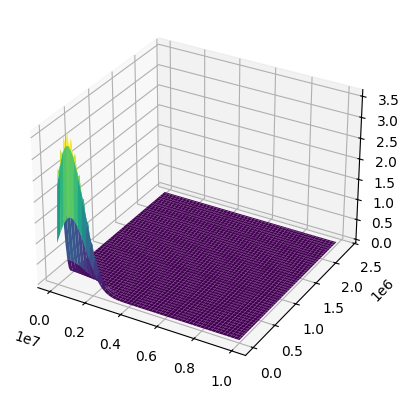

In [ ]:

fig = plt.figure()
a = fig.add_subplot(111,projection='3d')
a.plot_surface(x, y, z, cmap='viridis')
a.set

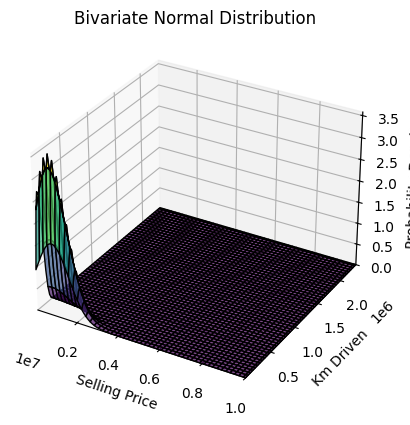

In [14]:
# Plot bivariate normal distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', alpha=0.7)
ax.set_xlabel('Selling Price')
ax.set_ylabel('Km Driven')
ax.set_zlabel('Probability Density')
ax.set_title('Bivariate Normal Distribution')
ax.set_xlim([data['selling_price'].min(), data['selling_price'].max()])
ax.set_ylim([data['km_driven'].min(), data['km_driven'].max()])
ax.set_zlim([z.min(), z.max()])
plt.show()

In [33]:
# Create DataFrame for mean vector
mean_df = pd.DataFrame(mean_vector, index=num_cols, columns=['Mean'])

# Create DataFrame for covariance matrix
cov_df = pd.DataFrame(cov_matrix, index=num_cols, columns=num_cols)

# Display the DataFrames
print("Mean Vector:")
display(mean_df)

print("Covariance Matrix:")
display(cov_df)

Mean Vector:


,Mean
selling_price,638271.807702
km_driven,69819.510827


Covariance Matrix:


,selling_price,km_driven
selling_price,6.500446e+11,-1.028300e+10
km_driven,-1.028300e+10,3.197965e+09


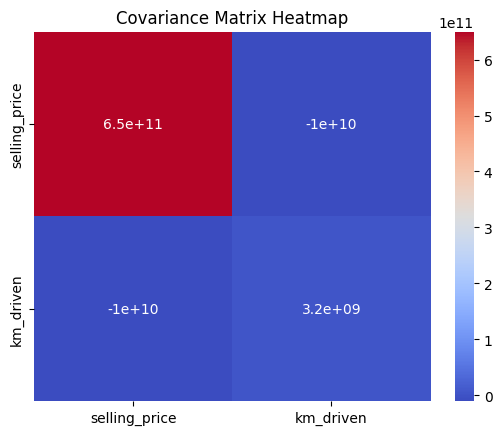

In [34]:
sns.heatmap(cov_df, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap')
plt.show()

In [16]:
# Print probability values for some data points
sample_points = data.sample(1).values  # Select 5 random data points
probabilities = multivariate_pdf(sample_points, mean_vector, cov_matrix)
print("Probabilities of selected data points:\n", probabilities)

Probabilities of selected data points:
 1.4925264170102011e-13
